
# Метод опорных векторов для задачи классификации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles, make_classification
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

## Бинарная классификация линейно разделимых классов

### 1.1 Cгенерируйте данные для задачи классификации на два класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 30 наблюдений так, чтобы два класса точек были линейно разделимы. Визуализируйте их на диаграмме рассеяния.

In [ ]:
X, y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=5, cluster_std=0.4)
X[:5]

array([[-5.51629264,  8.04763857],
       [-6.03989846,  8.76108988],
       [-5.53647888,  7.26932177],
       [-5.90036714,  8.99683108],
       [-5.48509529,  7.28269814]])

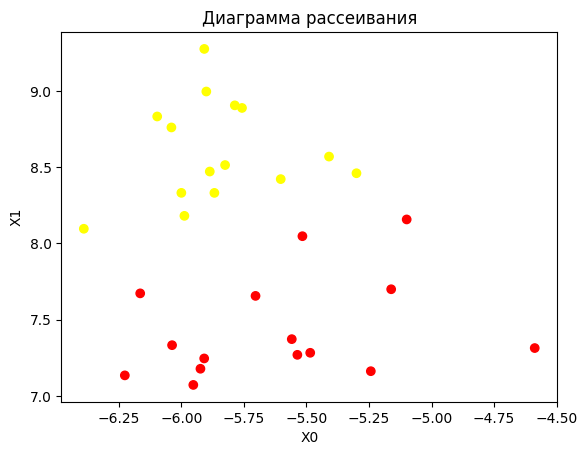

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### 1.2  Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром. Поскольку классы линейно разделимы, сделайте классификацию с жестким зазором, для этого возьмите большое значение C.

In [ ]:
svm_linear = SVC(kernel = 'linear', C = 100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

### 1.3  Выведете координаты опорных векторов (атрибут `support_vectors_`) и их индексы (атрибут support_). Выведете количество опорных векторов, принадлежащих каждому классу. Укажите опорные вектора на диаграмме рассеяния.

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29])

In [ ]:
svm_linear.n_support_

array([1, 2])

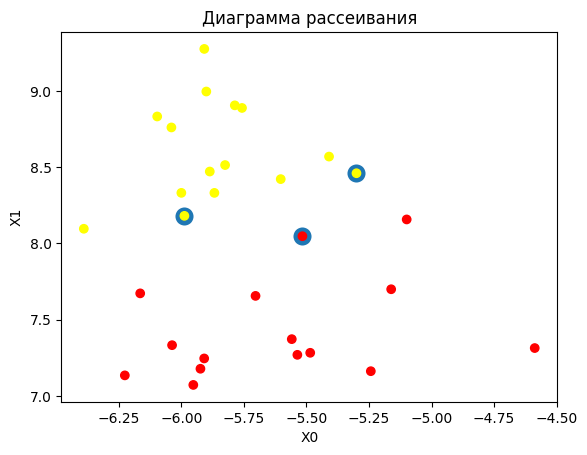

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidth = 7)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### 1.4  Выведете коэффициенты гиперплоскости и свободный член. Изобразите на графике линию разделения классов и линии зазора, как линии уровня гиперплоскости. Убедитесь, что метод `decision_function` выдаёт массив значений, который получается при подстановке данных в уравнение этой поверхности. И если значение в этом массиве меньше нуля, то соответствующее наблюдение относится к классу 0, а если оно больше нуля, то к классу 1. Напишите функцию `plot_decision_regions`, строящую линию разделения и зазор.

In [ ]:
svm_linear.intercept_

array([-64.2533988])

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z_grid = svm_linear.intercept_[0] + svm_linear.coef_[0][0] *X0_grid + svm_linear.coef_[0][1] *X1_grid

In [ ]:
np.array([X0_grid.ravel(), X1_grid.ravel()]).T

array([[-7.38992615,  6.07190486],
       [-7.35152112,  6.07190486],
       [-7.31311609,  6.07190486],
       ...,
       [-3.66463816, 10.27626087],
       [-3.62623313, 10.27626087],
       [-3.5878281 , 10.27626087]])

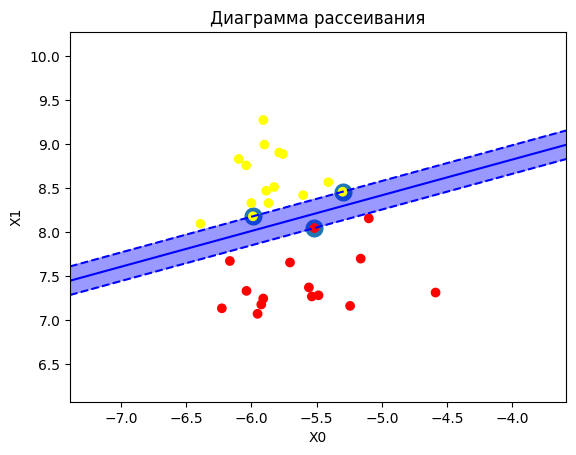

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], linewidth = 7)
plt.contour(X0_grid, X1_grid, Z_grid, levels=[-1, 0, 1], colors = 'b', linestyles = ['--', '-', '--'])
plt.contourf(X0_grid, X1_grid, Z_grid, levels=[-1, 0, 1], colors = 'b', alpha = 0.4)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.decision_function(X)

array([-0.99955506,  4.69451004, -5.73328797,  5.79485373, -5.77948397,
       -2.93838745, -5.04462056,  4.95305349,  0.99966959,  4.77568075,
        1.95746095,  1.51907024, -1.36522373,  5.27890892, -4.02534872,
        2.53366624, -1.68466963,  1.48351626, -5.3266102 , -7.12654602,
        7.53274364, -4.83817017,  1.94532985,  1.62630974, -4.94810925,
       -7.83070633,  2.64183699, -5.90735383, -4.09222798,  0.99975728])

In [ ]:
svm_linear.intercept_[0] + svm_linear.coef_[0][0] *X[:, 0] + svm_linear.coef_[0][1] *X[:, 1]

array([-0.99955506,  4.69451004, -5.73328797,  5.79485373, -5.77948397,
       -2.93838745, -5.04462056,  4.95305349,  0.99966959,  4.77568075,
        1.95746095,  1.51907024, -1.36522373,  5.27890892, -4.02534872,
        2.53366624, -1.68466963,  1.48351626, -5.3266102 , -7.12654602,
        7.53274364, -4.83817017,  1.94532985,  1.62630974, -4.94810925,
       -7.83070633,  2.64183699, -5.90735383, -4.09222798,  0.99975728])

In [ ]:
def plot_decision_region(X, y, model):
    X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z_grid = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)

    plt.contour(X0_grid, X1_grid, Z_grid, levels=[-1, 0, 1], colors = 'b', linestyles = ['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z_grid, levels=[-1, 0, 1], colors = 'b', alpha = 0.4)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth = 7)

    plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')

    plt.title("Диаграмма рассеивания")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

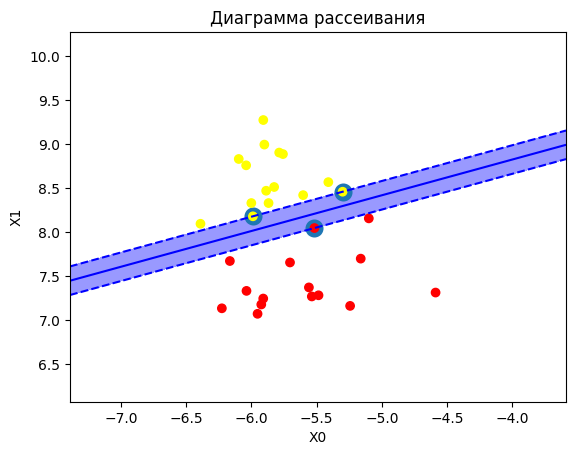

In [ ]:
plot_decision_region(X, y, svm_linear)

### 1.5  Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [ ]:
accuracy = svm_linear.score(X, y)
accuracy

1.0

In [ ]:
y_pred = svm_linear.predict(X)
f1 = metrics.f1_score(y, y_pred)
f1

1.0

In [ ]:
observation = [[-4, 9.5]]
y_pred_observation = svm_linear.predict(observation)
y_pred_observation

array([1])

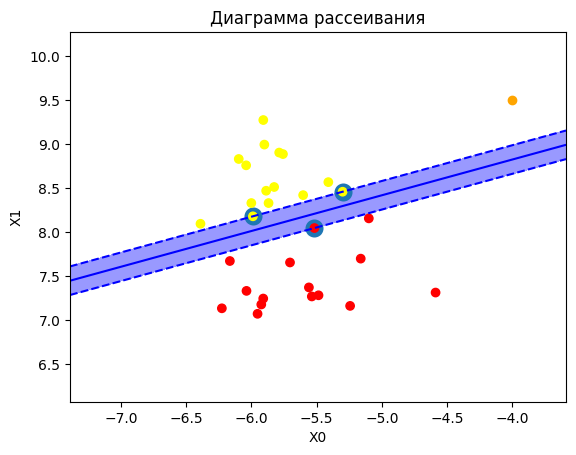

In [ ]:
plt.scatter(observation[0][0], observation[0][1], color = 'orange')
plot_decision_region(X, y, svm_linear)

##  Бинарная классификация линейно неразделимых классов

### 2.1 Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_circles`, содержащие два признака и 30 наблюдений так, чтобы два класса точек были линейно неразделимы, но на границе разделения точки не перекрывали друг друга. Визуализируйте данные на диаграмме рассеяния.

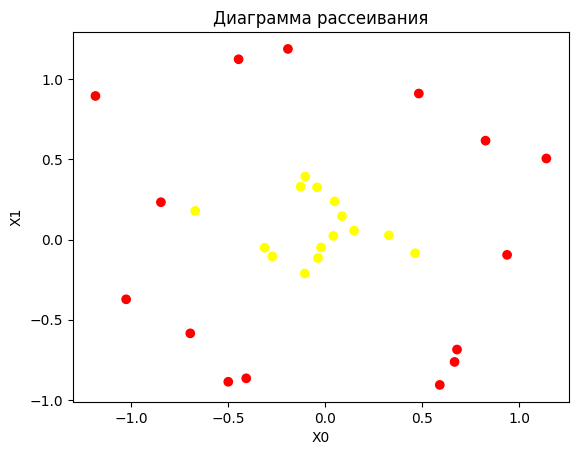

In [ ]:
X, y = make_circles(n_samples = 30, random_state = 5, noise = 0.2, factor = 0.1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### 2.2 Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с ядром в виде радиально базисной функции. Cделайте классификацию с жестким зазором, для этого возьмите большое значение гиперпараметра C.

In [ ]:
svm_rbf = SVC(kernel = 'rbf', C=100)
svm_rbf.fit(X, y)

SVC(C=100)

### 2.3 Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих    каждому классу. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и жесткий зазор. Оцените качество работы модели.

In [ ]:
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

In [ ]:
svm_rbf.support_

array([11, 20, 21, 23, 28, 29, 25, 27])

In [ ]:
svm_rbf.n_support_

array([6, 2])

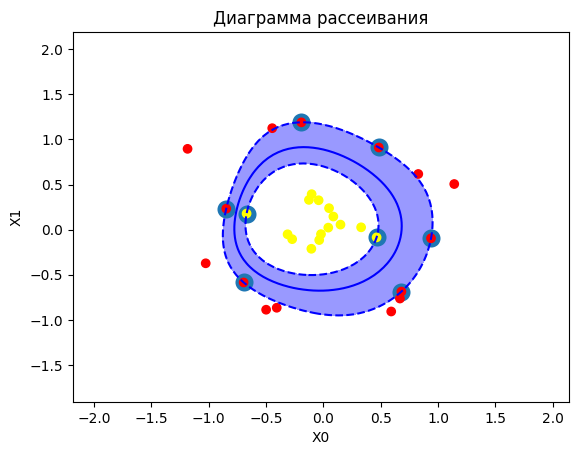

In [ ]:
plot_decision_region(X, y, svm_rbf)

In [ ]:
acc = svm_rbf.score(X, y)
acc

1.0

In [ ]:
y_pred = svm_rbf.predict(X)
f1 = metrics.f1_score(y, y_pred)
f1

1.0

### 2.4 Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_blobs`, содержащие  два признака и 30 наблюдений так, чтобы граница классов перекрывалась. Визуализируйте их на диаграмме рассеяния.

In [ ]:
X, y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=0, cluster_std=1)
X[:5]

array([[0.34899733, 2.84843906],
       [1.42013331, 4.63746165],
       [0.44136967, 0.68492338],
       [1.70735537, 1.05401263],
       [1.28933778, 3.44969159]])

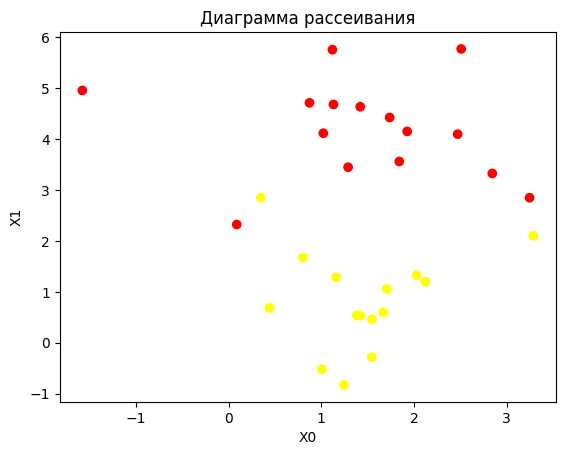

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### 2.5 Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с полиномиальным ядром. Поскольку классы линейно неразделимы, сделайте классификацию с мягким зазором, для этого возьмите маленькое значение гиперпараметра C.

In [ ]:
svm_poly = SVC(kernel='poly', C=1)
svm_poly.fit(X, y)

SVC(C=1, kernel='poly')

### 2.6 Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор. Оцените качество работы модели.

In [ ]:
svm_poly.support_vectors_

array([[ 1.28933778,  3.44969159],
       [-1.57671974,  4.95740592],
       [ 3.2460247 ,  2.84942165],
       [ 0.08848433,  2.32299086],
       [ 0.34899733,  2.84843906],
       [ 3.2855582 ,  2.10004351]])

In [ ]:
svm_poly.support_

array([ 4, 15, 17, 26,  0, 14])

In [ ]:
svm_poly.n_support_

array([4, 2])

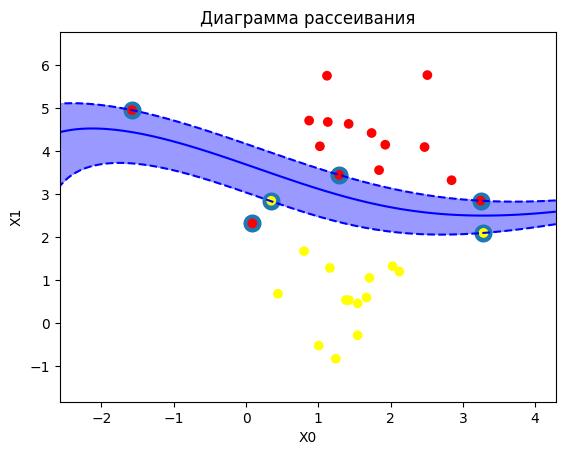

In [ ]:
plot_decision_region(X, y, svm_poly)

In [ ]:
acc = svm_poly.score(X, y)
acc

0.9666666666666667

In [ ]:
y_pred = svm_poly.predict(X)
f1 = metrics.f1_score(y, y_pred)
f1

0.967741935483871

**Задания для самостоятельного выполнения:**
1. Загрузите встроенные данные `sklearn.datasets.load_iris`. Возьмите последние два столбца (длина и ширина лепестков) и первые 100 строк данных, для того, чтобы иметь возможность рассматривать задачу бинарной классификации с двумя признаками.
2. Стандартизируйте данные.
3. Изобразите их на диаграмме рассеяния. Являются ли они линейно разделимыми?
4. Обучите модель опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром. Сделайте классификацию с жестким зазором.
5. Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и зазор. Оцените качество работы модели.
7. Сгенерируйте данные для задачи классификации на два класса при помощи `sklearn.datasets.make_classification`, содержащие  два признака и 100 наблюдений так, чтобы граница классов немного перекрывалась. Визуализируйте их на диаграмме рассеяния.
8. Обучите модели опорно-векторного классификатора `sklearn.svm.SVC` с линейным ядром, полиномиальным ядром пятой степени и с RBF-ядром. Сделайте классификацию с мягким зазором, для этого возьмите значение гиперпараметра `C = 1` для всех моделей.
9. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор для каждой модели. Вычислите метрики для оценки работы каждой модели. Сделайте вывод о том, какая модель лучше классифицирует эти данные.

1. Загрузите встроенные данные sklearn.datasets.load_iris. Возьмите последние два столбца (длина и ширина лепестков) и первые 100 строк данных, для того, чтобы иметь возможность рассматривать задачу бинарной классификации с двумя признаками.

In [ ]:
iris = load_iris()
X = iris.data[:100, 2:]
y = iris.target[:100]

iris_df = pd.DataFrame(X, columns=['Длина', 'Ширина'])
iris_df['Класс'] = y
iris_df

,Длина,Ширина,Класс
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


2. Стандартизируйте данные.

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
iris_df_std = pd.DataFrame(X_standardized, columns=['Длина', 'Ширина'])
iris_df_std['Класс'] = y
iris_df_std

,Длина,Ширина,Класс
0,-1.012978,-1.042111,0
1,-1.012978,-1.042111,0
2,-1.082312,-1.042111,0
3,-0.943643,-1.042111,0
4,-1.012978,-1.042111,0
...,...,...,...
95,0.928390,0.736235,1
96,0.928390,0.914070,1
97,0.997724,0.914070,1
98,0.096375,0.558401,1


3. Изобразите их на диаграмме рассеяния. Являются ли они линейно разделимыми?

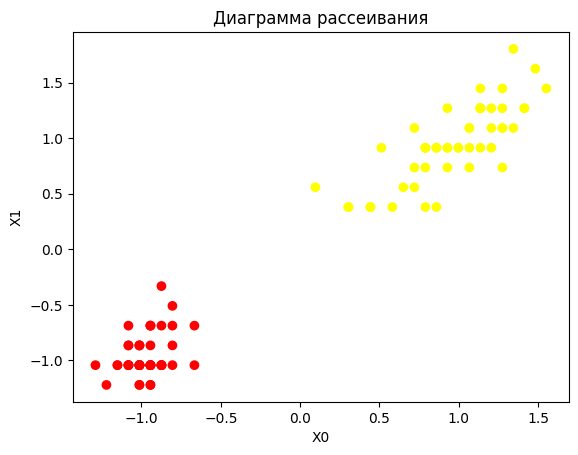

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

4. Обучите модель опорно-векторного классификатора sklearn.svm.SVC с линейным ядром. Сделайте классификацию с жестким зазором.

In [ ]:
svm_linear = SVC(kernel = 'linear', C = 100)
svm_linear.fit(X_std, y)

SVC(C=100, kernel='linear')

5. Выведете координаты опорных векторов и их индексы. Выведете количество опорных векторов, принадлежащих каждому классу. Изобразите на диаграмме рассеяния линию разделения и зазор. Оцените качество работы модели.

In [ ]:
svm_linear.support_vectors_

array([[-0.87430856, -0.3307724 ],
       [ 0.09637501,  0.55840072]])

In [ ]:
svm_linear.support_

array([43, 98])

In [ ]:
svm_linear.n_support_

array([1, 1])

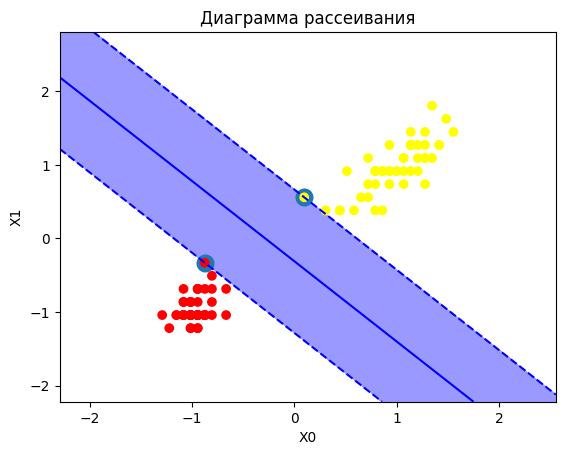

In [ ]:
plot_decision_region(X_std, y, svm_linear)

6. Сгенерируйте данные для задачи классификации на два класса при помощи sklearn.datasets.make_classification, содержащие два признака и 100 наблюдений так, чтобы граница классов немного перекрывалась. Визуализируйте их на диаграмме рассеяния.

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1, random_state=5)
X[:5]

array([[-2.11651888, -2.65004766],
       [ 1.83206525, -0.74561534],
       [ 2.03722337, -0.4905997 ],
       [ 2.12945908, -0.34878879],
       [-0.566895  , -1.06057167]])

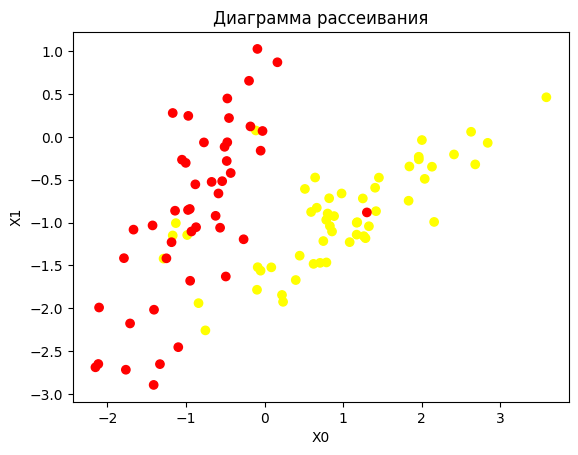

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='autumn')
plt.title("Диаграмма рассеивания")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

7. Обучите модели опорно-векторного классификатора sklearn.svm.SVC с линейным ядром, полиномиальным ядром пятой степени и с RBF-ядром. Сделайте классификацию с мягким зазором, для этого возьмите значение гиперпараметра C = 1 для всех моделей.

In [ ]:
svm_linear = SVC(kernel = 'linear', C = 1)
svm_poly = SVC(kernel = 'poly', C = 1)
svm_rbf = SVC(kernel = 'rbf', C = 1, degree = 5)

svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

In [ ]:
svm_poly.fit(X, y)

SVC(C=1, kernel='poly')

In [ ]:
svm_rbf.fit(X, y)

SVC(C=1, degree=5)

8. Изобразите на диаграмме рассеяния линию разделения и мягкий зазор для каждой модели. Вычислите метрики для оценки работы каждой модели. Сделайте вывод о том, какая модель лучше классифицирует эти данные.

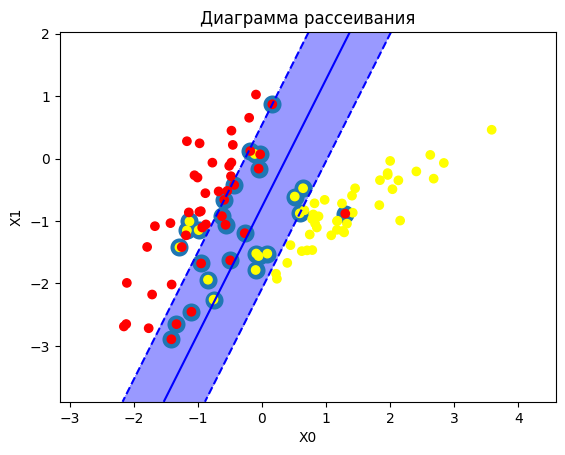

In [ ]:
plot_decision_region(X, y, svm_linear)

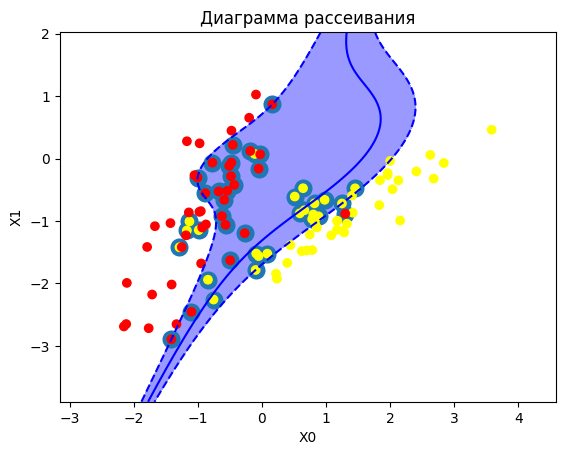

In [ ]:
plot_decision_region(X, y, svm_poly)

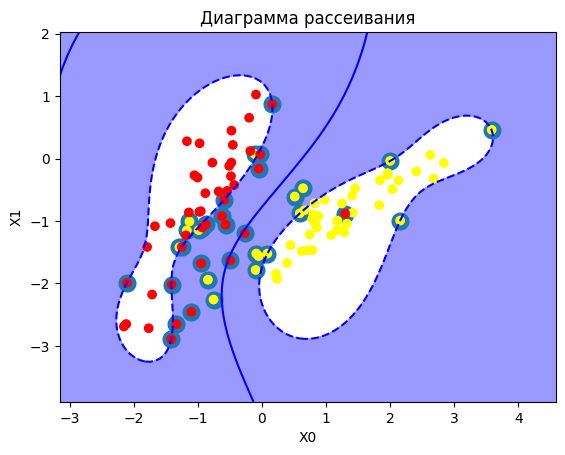

In [ ]:
plot_decision_region(X, y, svm_rbf)

In [ ]:
acc = svm_poly.score(X, y)
y_pred = svm_poly.predict(X)
f1 = metrics.f1_score(y, y_pred)
acc, f1

(0.91, 0.9108910891089108)

In [ ]:
acc = svm_linear.score(X, y)
y_pred = svm_linear.predict(X)
f1 = metrics.f1_score(y, y_pred)
acc, f1

(0.92, 0.9215686274509804)

In [ ]:
acc = svm_rbf.score(X, y)
y_pred = svm_rbf.predict(X)
f1 = metrics.f1_score(y, y_pred)
acc, f1

(0.9, 0.9038461538461539)